# Taller 02 de métodos computacionales para físicos  y astronomos
- Universidad de Antioquia
- Estiven Castrillon Alzate 1040570656

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, optimize
from warnings import filterwarnings

filterwarnings('ignore')
plt.style.use('dark_background')

In [8]:
# Métodos para encontrar raíces de funciones 
def newton_rapson(funcion, punto_inicial: float, tolerancia: float=10e-5, max_iter: int=1_000):
    """
    Aplica el método de Newton-Raphson para encontrar una raíz de la función.

    Parámetros:
    - funcion: Función para la cual se busca una raíz.
    - punto_inicial: Valor inicial para comenzar la iteración.
    - tolerancia: Tolerancia para detener el algoritmo cuando el valor absoluto de la función en el punto inicial es menor que este valor.
    - max_iter: Número máximo de iteraciones permitidas.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    contador = 0

    while (abs(funcion(punto_inicial)) > tolerancia) and (contador <= max_iter):
        derivada = misc.derivative(funcion, punto_inicial, dx=10e-5)
        p = punto_inicial - (funcion(punto_inicial) / derivada) # Aplicación de la fórmula
        punto_inicial = p # Redefiniendo para hacer un proceso iterativo
        contador += 1

    # Imprimir el resultado
    if contador > max_iter:
        pass
    else:
        return punto_inicial
    
def secante(funcion, p_a: float, p_b: float, tolerancia: float=10e-5):
    """
    Implementa el método de la secante para encontrar una raíz de la función dada.

    Parámetros:
    - funcion: La función para la cual se busca la raíz.
    - p_a: Punto inicial para el método.
    - p_b: Punto adicional necesario para el método.
    - tolerancia: La tolerancia para la convergencia del método.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    while abs(funcion(p_a)) > tolerancia:
        p_c = p_a - funcion(p_a) * (p_a - p_b) / (funcion(p_a) - funcion(p_b))
        p_a, p_b = p_c, p_a

    return p_a

**1** En mecánica orbital, al resolver el problema de la fuerza central se hace necesario resolver la ecuación de Kepler. Esta es una ecuación trascendental que relaciona los parámetros orbitales de la trayectoria.

*Kepler equation:* $M = E - \epsilon \sin E$

donde $ M $ es la anomalía media, $ E $ la anomalía excéntrica y $ \epsilon $ la excentricidad. La anomalía media se puede calcular con la expresión

$$M = n\ t = \sqrt{ \frac{GM_c}{a^3} } t$$

donde $ n $ es el movimiento medio, $ G $ la constante gravitacional, $ M_c $ la masa del cuerpo central y $ a $ el eje semi-mayor. $ t $ es el tiempo en que se calculará la posición en la trayectoria.

Las coordenadas $ x $ y $ y $ como funciones de tiempo se pueden recuperar mediante las siguientes expresiones

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

donde $ b = a \sqrt {1- \epsilon ^ 2} $ es el eje semi-menor de la órbita y la dependencia temporal implícita de la anomalía excéntrica $ E $ se calcula a través de la ecuación de Kepler.

**Problem:**

**a)** Para una estrellita que orbita la Tierra en una trayectoria ecuatorial con excentricidad $ \epsilon = 0.5 $ a una distancia geoestacionaria para el eje semi-mayor, tabule las posiciones $ x $ y $ y $ dentro del plano orbital en intervalos de $ 15 $ min durante $ 5 $ horas, graficar x y y.

**b)** Encuentre cuanto tarda el cuerpo en dar una vuelta completa.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ $m^3$ $kg^{-1}$ $s^{-2}$

- $M_{\oplus} = 5.972\times 10^{24} kg$

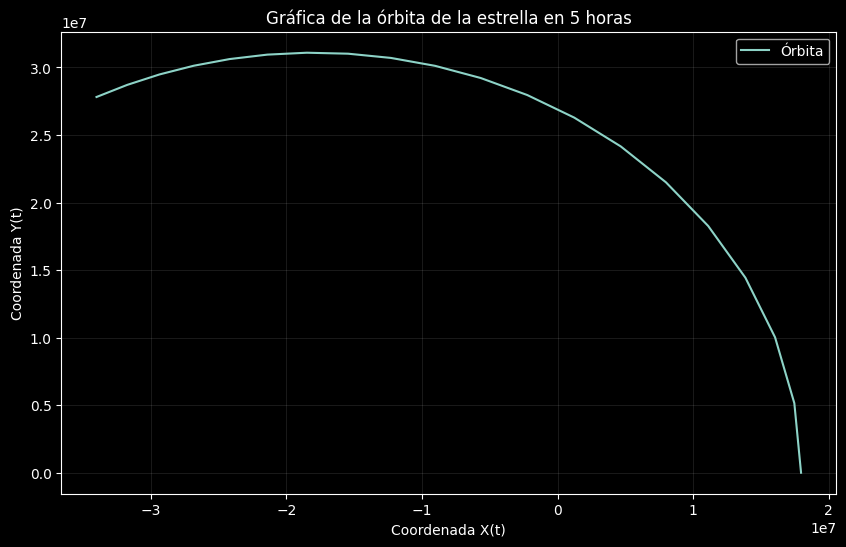

In [3]:
# Definición de parámetros
excentricidad = 0.5
a = 35_900_000
G = 6.67384e-11
M_c = 5.972e24
b = a * np.sqrt(1 - excentricidad**2)

# a) Estrella que orbita la Tierra
intervalos = np.arange(0, 18000, 900) # Intervalos de 15 minutos en 5 horas

# Ecuación M = n * t = sqrt(G * M_c / a**3) * t
def anomalia_med(t, G, masa_cuerpo, a):
    return np.sqrt(G * masa_cuerpo / a**3) * t

def ecuacion_kepler_cero(E, M, excentricidad):
    return E - excentricidad * np.sin(E) - M

M = np.array([anomalia_med(t, G, M_c, a) for t in intervalos]) # Anomalía media
E = np.array([]) # Array vacío para almacenar las anomalías excéntricas

for i in range(len(M)):
    anomalia_exc = newton_rapson(lambda x: ecuacion_kepler_cero(x, M[i], excentricidad), 0.5) # Aplicando el método de Newton-Raphson
    E = np.append(E, anomalia_exc) # Añadiendo a la lista

# Gráfica de la órbita en intervalos de 15 minutos
coordenadax = a * (np.cos(E) - excentricidad)
coordenaday = b * np.sin(E)

plt.figure(figsize=(10,6))
plt.plot(coordenadax, coordenaday, label='Órbita')
plt.title('Gráfica de la órbita de la estrella en 5 horas') 
plt.xlabel('Coordenada X(t)')
plt.ylabel('Coordenada Y(t)')
plt.grid(True, alpha=0.1) 
plt.legend()
plt.show()

In [4]:
# b) ¿Cuánto tiempo tarda la estrella en dar una vuelta completa?

**2** Se planea hacer una antena con una  barra de longitud $l$, la cual está localizada a lo largo del eje $x$ y tiene una carga neta $Q$. Se puede demostrar que el potencial a un punto con coordenadas $P = (0,d)$ es dado por

$$V=  \frac{kQ}{l} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$

**a)** Grafique la función, ¿cuántas raíces hay? (use `l = np.arange(0, 2.0, 0.001))`.
De un valor aproximado a partir de la gráfica $d=0.3$ m  (use $kQ=1$ ).

**b)**. Usando el método de la Secante calcule la longitud de la barra que produce un potencial de $0.5$ V  a una distancia en $d=0.3$ m  (use $kQ=1$ ).

**c)**. Usando un p_o de su elección, ¿Cuántas iteraciones son necesarias para hallar $l$ con un error menor que $10^{-8}$?

**d)**. Elija un intervalo $(a,b)$ y corrobore su resultado usando el método de bisección ¿Cuántas iteraciones son necesarias para hallar la longitud con un error menor que $10^{-5}$ ?

<!-- 
Solución:
$$l=  \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$
que define la ecuación de punto fijo $l=g(l)$ o también el problema de raíces,

$$f(l) = l - \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)=0,$$ -->

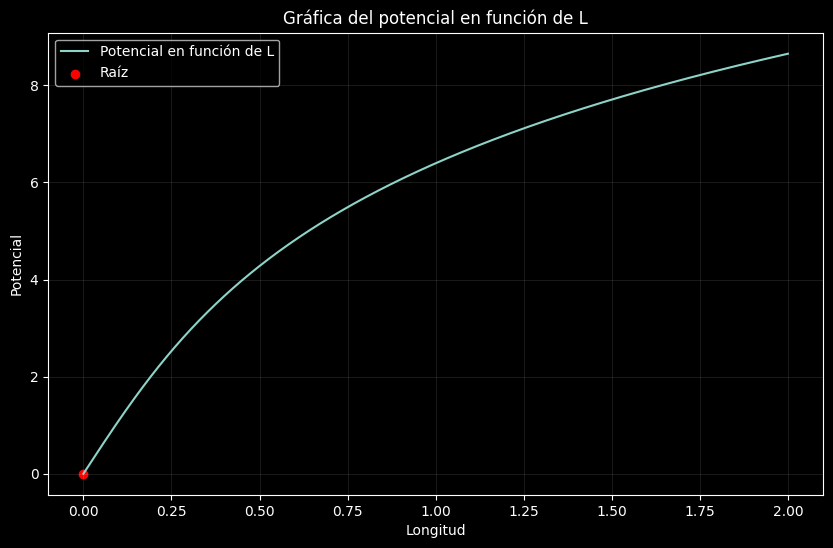

1.597090689949357e-10


In [5]:
# a) Gráfica de la función
# Definición de parámetros
d = 0.3
kQ = 1
l = l = np.arange(0, 2.0, 0.001)

def potencial(kQ, d, l):
    return (kQ / d) * np.log((l + np.sqrt(l**2 + d**2)) / d)

raiz = newton_rapson(lambda x: potencial(kQ, d, x), 0.5)

# Plot the function
plt.figure(figsize=(10,6))
plt.plot(l, potencial(kQ, d, l), label='Potencial en función de L')
plt.scatter(raiz, potencial(kQ, d, raiz), color='red', label='Raíz')  # plot the root
plt.title('Gráfica del potencial en función de L')
plt.xlabel('Longitud')
plt.ylabel('Potencial')
plt.grid(True, alpha=0.1)
plt.legend()
plt.show()
print(f'Valor aproximado de la raíz: {raiz}')

In [10]:
# b) Método de la Secante para calcular la longitud de la barra
V = 0.5
def potencial_cero(l):
    return (kQ / l) * np.log((l + np.sqrt(l**2 + d**2)) / d) - V

raiz_secante = secante(potencial_cero, 0.5, 1.5)
raiz_secante

7.938355496337021

In [ ]:
# c)

**3** Considere un resorte con un extremo pegado a una pared y al otro extremo se le aplica una fuerza constante de 2N, si la resorte opone una fuerza de resistencia a la deformación dada por $F=k(x)x=exp(x)x$,

**a)** calcule el valor para el cual las fuerzas se equilibran.

**b)** considere que el resorte se le cuelga un peso $W=1 Kg$ , calcule las distancias $(x,y)$ de equilibrio.

**4** **a)** Consulte e implemente el python el algoritmo de la falsa posición para encontrar raíces.

**b)** Repita el ejercicio anterior usando todos los métodos vistos y consultados, compare el número de iteraciones y el tiempo te computo de cada uno.